# Image Analysis

In [37]:
# basic imports and notebook configurations
# standard Python modules
import calendar
import copy
import csv
import datetime
import importlib
import itertools
import logging
import os
import sys

# additional Python modules
import dateutil
import matplotlib.pyplot as plt
import numpy as np
import pytz
%load_ext autoreload
%autoreload 2
%matplotlib inline

# own python modules
from methods import *

# %aimport analyis
#importlib.reload(influx_db)
#importlib.reload(plot_tools)
plt.style.use('classic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## logging configuration

In [38]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
log = logging.getLogger(os.path.splitext(os.path.basename(sys.argv[0]))[0])
log.setLevel(logging.INFO)

### Development setup

2023-04-19 09:13:35,394 - INFO - methods.py - get_image_files - found 299 images
2023-04-19 09:13:35,395 - INFO - methods.py - make_histo - Already created histogramm for image 00000015_00000000427AD809 in folder png_cases
2023-04-19 09:13:35,434 - INFO - methods.py - segment_camera - Cam seed value: 11
2023-04-19 09:13:35,516 - INFO - methods.py - segment_camera - Unique values cam [0 1]
2023-04-19 09:13:35,893 - INFO - methods.py - segment_instability - Insta seed value: 95
2023-04-19 09:13:37,297 - INFO - methods.py - segment_instability - Unique values insta [0 1]
2023-04-19 09:13:38,354 - INFO - methods.py - refine_instability - Contours_n: 1
2023-04-19 09:13:38,551 - INFO - methods.py - close_instability - cX: 1237, cY: 1386
2023-04-19 09:13:38,553 - INFO - methods.py - close_instability - (1297, 1102, 177, 244)
2023-04-19 09:13:38,618 - INFO - methods.py - close_instability - Slope: -0.084673023679198
2023-04-19 09:13:38,717 - INFO - methods.py - close_instability - Seed value: 

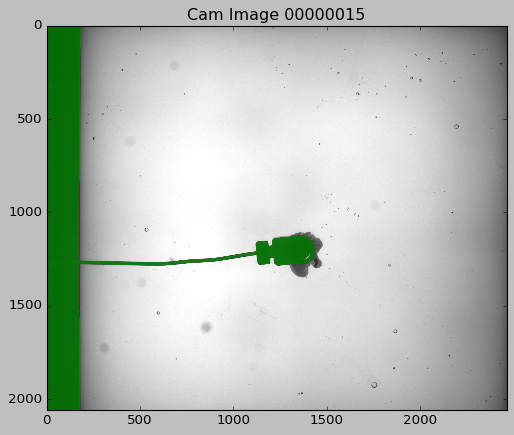

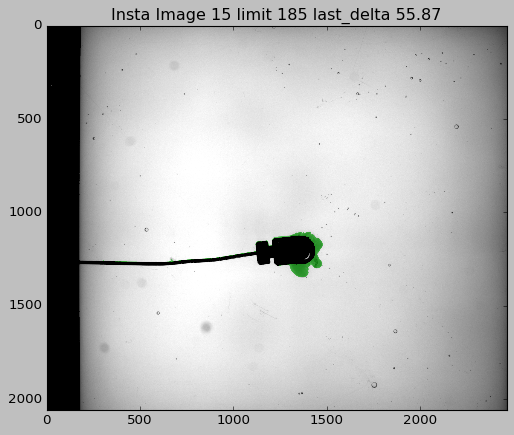

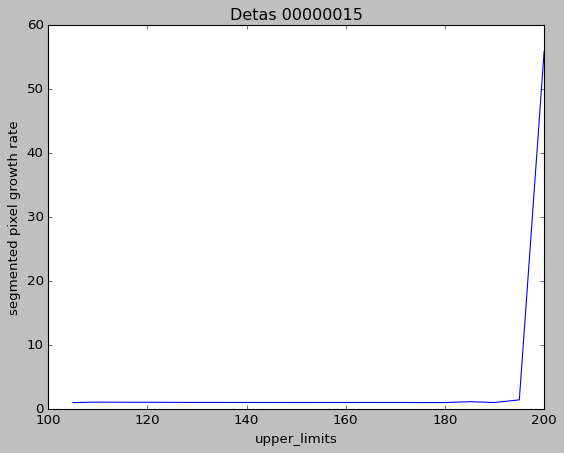

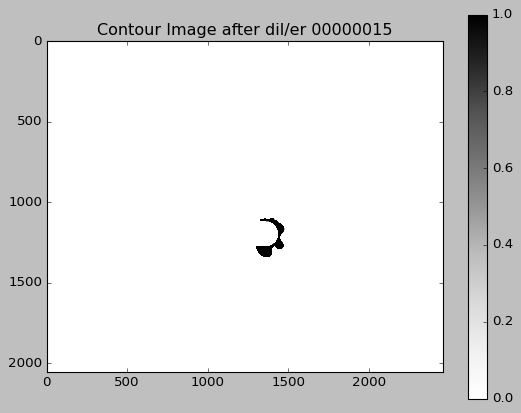

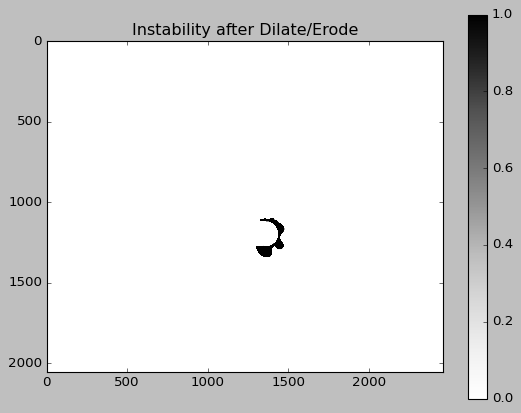

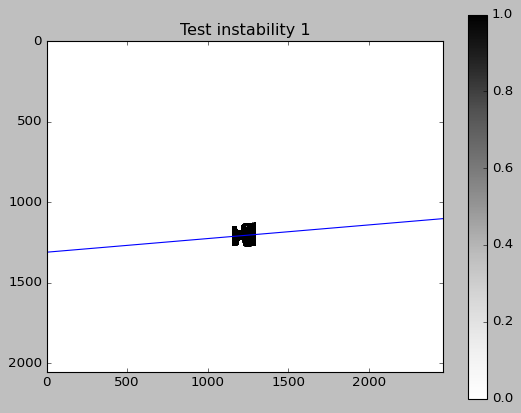

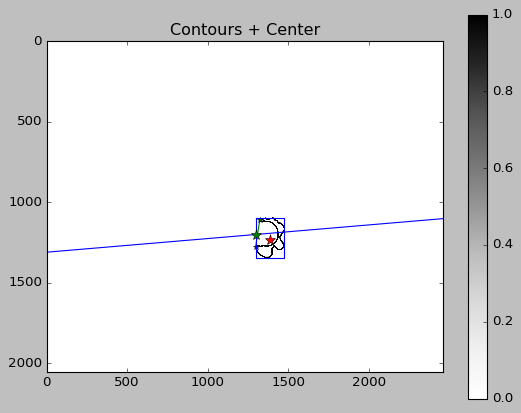

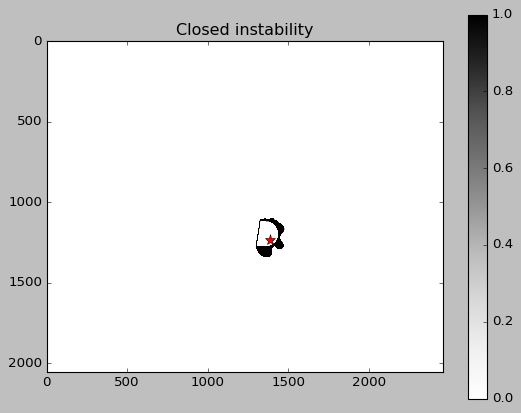

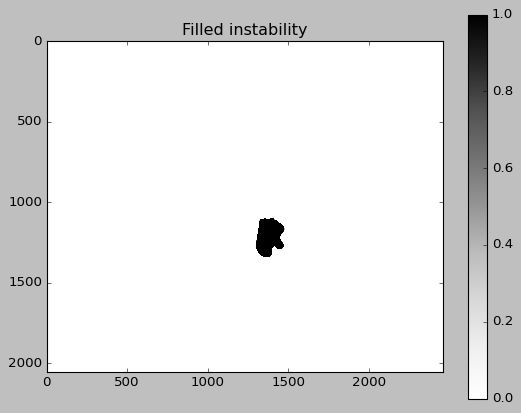

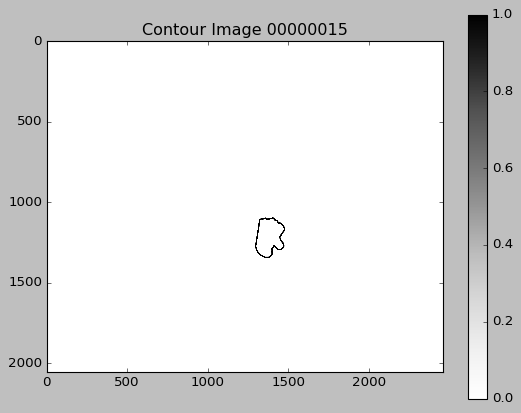

In [39]:
# read config
config = get_config()
# get dev case
cases = config["cases"]
# get image name
for cas in cases:
    images = get_image_files(config, cas, "png_cases")
    for img in images:
        process_image(img, config, cas)